In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df1 = pd.read_csv("/content/takehome_users.csv", encoding = "ISO-8859-1")
df1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [ ]:
df2 = pd.read_csv("/content/takehome_user_engagement.csv")
df2

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [ ]:
df1.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [ ]:
df2.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

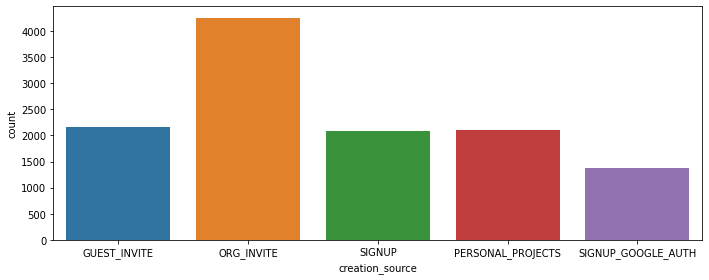

In [ ]:
fig = plt.subplots(figsize=(10,4))
sns.countplot(x='creation_source',data=df1)

plt.tight_layout()
plt.show()

# Adopted User:

In [ ]:
import datetime
from datetime import timedelta

In [ ]:
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])         # converting into datetime format
df2['time_stamp']

0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
                 ...        
207912   2013-09-06 06:14:15
207913   2013-01-15 18:28:37
207914   2014-04-27 12:45:16
207915   2012-06-02 11:55:59
207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [ ]:
def logins_in_days(df, days=7, logins=3):
    
    df['date'] = df['time_stamp'].dt.date       # creating a column which returns the date only
    df = df.drop_duplicates(subset='date').sort_values('date')     
    
    days_taken = df['date'].diff(periods=logins-1)   # days_taken for 3 logins
    return any(days_taken <= timedelta(days=days))  # returns true if days_taken <=7 days

In [ ]:
adopted = df2.groupby('user_id').apply(logins_in_days)  # grouping based on user_id
adopted.name = 'adopted_user'                             # naming the column
adopted

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: adopted_user, Length: 8823, dtype: bool

In [ ]:
print('There were {} adopted users out of {} users'.format(sum(adopted), len(adopted)))       # sum(adopted) : if True

There were 1656 adopted users out of 8823 users


In [ ]:
df1 = df1.set_index(['object_id'])    # Set the DataFrame index using existing columns
df1.index.name = 'user_id'        # rename object_id into user_id

In [ ]:
df1 = pd.concat([df1, adopted], axis=1, join='inner')  # joining 2 dataframes, axis in 'column'
df1['adopted_user'] = df1['adopted_user'].astype(int)       # converting the data into int type

df1.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [ ]:
fig = px.pie(df1,values='adopted_user',names='creation_source')
fig.show()

# Time Span of the Account

In [ ]:
# set 'creation_time' into dataframe:
df1.creation_time = pd.to_datetime(df1.creation_time)

In [ ]:
# convert values of 'last_session_creation_time':
df1['last_session_creation_time'] = df1['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')
# now set that to datetime:
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])

In [ ]:
# replace null values in user_id
df1.invited_by_user_id = df1.invited_by_user_id.fillna(0)

In [ ]:
df1['time_span_of_the_account'] = df1['last_session_creation_time'] - df1['creation_time']
df1['time_span_of_the_account'] = df1['time_span_of_the_account'].dt.days        # display only date 

df1 = df1.drop(['creation_time', 'last_session_creation_time','name','email'], axis=1)   # dropping unnecessary columns
df1.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0,0
2,ORG_INVITE,0,0,1,316.0,1,136
3,ORG_INVITE,0,0,94,1525.0,0,0
4,GUEST_INVITE,0,0,1,5151.0,0,1
5,GUEST_INVITE,0,0,193,5240.0,0,5


In [ ]:
df1 = df1.sort_values(by="adopted_user")
fig = px.bar(df1, y="opted_in_to_mailing_list", x="creation_source", color="adopted_user",
             color_continuous_scale='Bluered_r', hover_name="org_id")

fig.update_layout(title_text="opted_in_to_mailing_list	VS creation_source")
fig.show()

In [ ]:
df1 = df1.sort_values(by="adopted_user")
fig = px.bar(df1, y="enabled_for_marketing_drip", x="creation_source", color="adopted_user",
             color_continuous_scale='Bluered_r', hover_name="org_id")

fig.update_layout(title_text="enabled_for_marketing_drip	VS creation_source")
fig.show()

In [ ]:
fig = px.scatter(df1,x="time_span_of_the_account",y="adopted_user")  

fig.update_layout(title_text="time_span_of_the_account vs adopted_user")
fig.update_traces(marker_size=15)
fig.show()

In [ ]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

creation_labels = le.fit_transform(df1['creation_source'])
df1.creation_source = creation_labels

org_id_labels = le.fit_transform(df1['org_id'])
df1.org_id = org_id_labels

invited_labels = le.fit_transform(df1['invited_by_user_id'])
df1.org_id = invited_labels

In [ ]:
df1.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,
1,0,1,0,2024,10803.0,0,0
2494,1,0,0,457,2494.0,0,0
2496,3,0,0,0,0.0,0,2
2498,3,0,0,0,0.0,0,1
2476,4,0,0,0,0.0,0,0


In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X = df1.drop('adopted_user', axis=1)
y = df1.adopted_user

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# modelling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9574175824175825

In [ ]:
# feature importance

feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance.coef.nlargest(5)

time_span_of_the_account    0.918839
invited_by_user_id          0.031747
org_id                      0.030943
creation_source             0.010100
opted_in_to_mailing_list    0.004826
Name: coef, dtype: float64

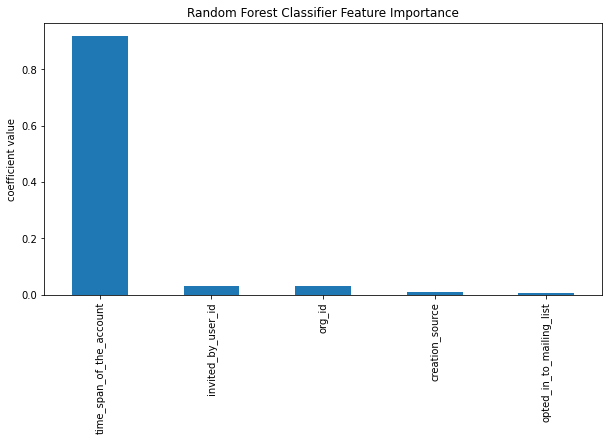

In [ ]:
#plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(5).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()

* time span of the account is the most important feature fot detemining the adopted user.